#### Newton-Raphson Algorithmus

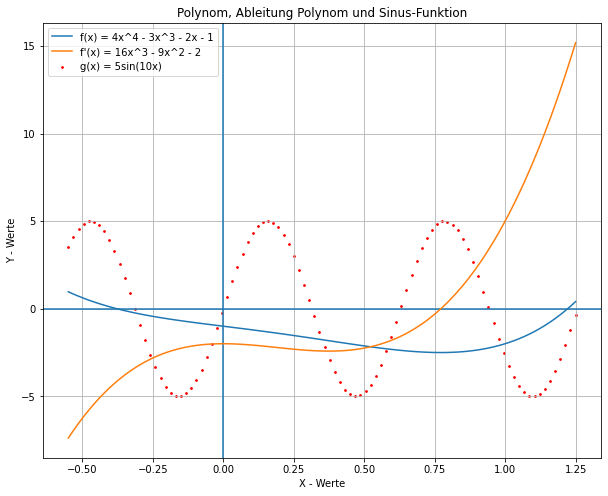

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def f(x):
    return 4*x**4 - 3*x**3 - 2*x - 1


def df(x):
    return 16*x**3 - 9*x**2 - 2


xvalues = np.linspace(-0.55, 1.25, 100)
yvalues = f(xvalues)
df_yvalues = df(xvalues)
plt.figure(figsize=(10.0, 8.0))
plt.axhline(0)
plt.axvline(0)
plt.plot(xvalues, yvalues, label="f(x) = 4x^4 - 3x^3 - 2x - 1")
plt.plot(xvalues, df_yvalues, label="f'(x) = 16x^3 - 9x^2 - 2")
sin = 5*np.sin(10*xvalues)
plt.scatter(xvalues, sin, s=3, c='red', label='g(x) = 5sin(10x)')
plt.xlabel('X - Werte')
plt.ylabel('Y - Werte')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Polynom, Ableitung Polynom und Sinus-Funktion')
plt.show()
plt.close()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def f(x):
    return 4*x**4 - 3*x**3 - 2*x - 1


def df(x):
    return 16*x**3 - 9*x**2 - 2


delta = 1.0e-10
rvalues = np.linspace(-10, 10, 100000)
roots = []

for r in xvalues:
    guess = r
    for n in range(1000):
        next_guess = guess - f(guess)/df(guess)
        if abs(next_guess - guess) < delta:
            already_in = False
            for root in roots:
                if abs(next_guess - root) < delta:
                    already_in = True
                    break
            if not already_in:
                roots.append(next_guess)
            break
        guess = next_guess
print(roots)


[-0.3780737706648974, 1.221912084397845]


#### Primzahlenberechnung mit der Methode "Sieb des Eratosthenes

In [18]:

import numpy as np
from math import isqrt
import time
from sys import getsizeof


def primes_less_than(n):
    if n <= 2:
        return []
    is_prime = n * [True]
    # is_prime = np.array(n * [True], dtype=bool)
    is_prime[0] = False
    is_prime[1] = False
    print(f'Größe der Liste/Array = {getsizeof(is_prime):>15,d}')

    for i in range(2, isqrt(n)+1):
        if is_prime[i]:
            for x in range(i*i, n, i):
                is_prime[x] = False

    return [i for i in range(n) if is_prime[i]]


if __name__ == '__main__':
    t0 = time.perf_counter()
    # n = 10_000 # 0.01 Sekunden
    # n = 10_000_000 # 1.8 Sekunden
    n = 100_000_000  # 19.8 Sekunden
    # n = 1_000_000_000  # 218.0 Sekunden für 50,847,534 Primzahlen
    list_prim = primes_less_than(n)
    tdelta = time.perf_counter() - t0
    last_prim = list_prim[-1]
    anz_prim = len(list_prim)
    print(f'Laufzeit : {tdelta:6,.2f} Sekunden')
    print(
        f'Letzte Primzahl im Bereich bis {n:<,d} = {last_prim:>12,d} Anzahl = {anz_prim:12,d}')
    if n <= 10_000:
        with open('test.txt', 'w') as f:
            for n in list_prim:
                f.write(f'{n:>15,d}\n')


Größe der Liste/Array =     800,000,056
Laufzeit :  49.67 Sekunden
Letzte Primzahl im Bereich bis 100,000,000 =   99,999,989 Anzahl =    5,761,455


#### Nullstellen einer Funktion mit sympy ermitteln

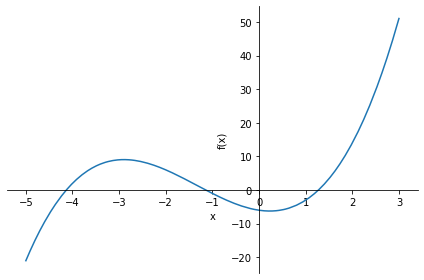

In [2]:
from sympy import *
init_printing(use_unicode=True)
x = Symbol('x')
f = Function('f')('x')
a1 = x**3 + 4*x**2 - 2*x - 6
g = (Eq(f, a1))
plot(a1, (x, -5, 3))
g


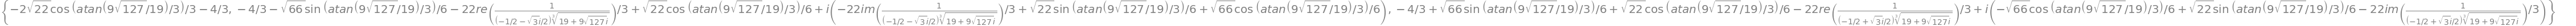

In [5]:
f = a1
e = solveset(Eq(f, 0))
e

In [4]:
N(e)

#### Tests mit numpy

In [8]:
import numpy as np
from sys import getsizeof
import random

temp = [random.randint(0, 200) for _ in range(1000)]
np_temp = np.array(temp)
print(f'Größe von Python list : {getsizeof(temp):>15,d}')
print(f'Größe von Numpy array : {getsizeof(np_temp):>15,d}')


Größe von Python list :           8,856
Größe von Numpy array :           4,112
